## Importing libraries and loading data

In [11]:
# Import necessary libraries
import numpy as np  # Import NumPy for handling numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import warnings  # Import Warnings to suppress unnecessary warnings

# Suppress warning messages
warnings.filterwarnings("ignore")

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import mean_squared_error for evaluating model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import train_test_split for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from pytorch_tabnet.tab_model import TabNetRegressor
import torch

# Set Pandas options to display a maximum of 1000 rows
pd.set_option('display.max_rows', 1000)

%matplotlib inline

In [12]:
df2 = pd.read_csv('airbnb-listings.csv', delimiter = ';').drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped'], axis=1)
df2.head()

,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,Perfect location to enjoy Amsterdam's famous e...,NaN,NaN,NaN,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,NaN,Public transport is very close - 100 meters,NaN,You'll have the apartment for yourselves,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,Do not hesitate to contact us with your questi...,A few important spots in the city: - van Gogh ...,"A Wi-Fi connection, cable TV/DVD and central h...",When we are present you can only rent the top ...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,NaN,NaN,NaN,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic


In [13]:
%%time
# Read the dataset from a CSV file into a Pandas DataFrame
df = pd.read_csv('airbnb-listings.csv', delimiter = ';').drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped'], axis=1)
item0 = df.shape[0]  # Stores the initial number of rows in the DataFrame
df = df.drop_duplicates()  # Removes duplicate rows from the DataFrame
item1 = df.shape[0]  # Stores the number of rows after removing duplicates
print(f"There are {item0-item1} duplicates found in the dataset")  # Prints the number of duplicates that were removed

# Select only record with given price
df = df[df['Price']>0]

# Replace some locations with more common values
replacement_dict = {'Αθήνα, Greece': 'Athens, Greece',
                    'Athina, Greece': 'Athens, Greece',
                    'Roma, Italy': 'Rome, Italy',
                    'Venezia, Italy': 'Venice, Italy',
                    'København, Denmark': 'Copenhagen, Denmark',
                    'Montréal, Canada': 'Montreal, Canada',
                    'Ville de Québec, Canada': 'Québec, Canada',
                    'Genève, Switzerland': 'Geneva, Switzerland',
                    'Palma, Spain': 'Palma de Mallorca, Spain',
                    'Wien, Austria': 'Vienna, Austria',
                    'Greater London, United Kingdom': 'London, United Kingdom'
                   }
df['Smart Location'] = df['Smart Location'].replace(replacement_dict).fillna('None').astype(str)

# Show only selected columns
selected_cols = ['Price', 'Smart Location', 'Room Type', 'Property Type', 'Bed Type', 'Availability 365', 'Minimum Nights', 'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy']
df = df[selected_cols]

df = df.dropna()

print(df.shape)  # Prints the dimensions (rows and columns) of the filtered DataFrame
df.sample(5).T  # Displays a random sample of 5 rows transposed for better visibility

There are 0 duplicates found in the dataset
(362417, 10)
CPU times: total: 49.4 s
Wall time: 50.6 s


,83656,272335,133995,6584,444883
Price,219.0,225.0,50.0,65.0,150.0
Smart Location,"San Diego, CA","Amsterdam, Netherlands","Paris, France","Barcelona, Spain","Paris, France"
Room Type,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt
Property Type,Loft,Apartment,Apartment,Apartment,Apartment
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Availability 365,68.0,124.0,12.0,100.0,365.0
Minimum Nights,1.0,3.0,1.0,1.0,2.0
Number of Reviews,31.0,1.0,14.0,4.0,4.0
Review Scores Rating,99.0,100.0,100.0,55.0,100.0
Cancellation Policy,strict,strict,moderate,strict,flexible


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362417 entries, 0 to 494951
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Price                 362417 non-null  float64
 1   Smart Location        362417 non-null  object 
 2   Room Type             362417 non-null  object 
 3   Property Type         362417 non-null  object 
 4   Bed Type              362417 non-null  object 
 5   Availability 365      362417 non-null  float64
 6   Minimum Nights        362417 non-null  float64
 7   Number of Reviews     362417 non-null  float64
 8   Review Scores Rating  362417 non-null  float64
 9   Cancellation Policy   362417 non-null  object 
dtypes: float64(5), object(5)
memory usage: 30.4+ MB


## Data visualisation

## Data transformation

In [15]:
# Accessing DataFrame columns
# This line of code retrieves the column names from a DataFrame called 'df'.
# It allows you to access and work with the names of the columns in the DataFrame.

df.columns

Index(['Price', 'Smart Location', 'Room Type', 'Property Type', 'Bed Type',
       'Availability 365', 'Minimum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Cancellation Policy'],
      dtype='object')

In [16]:
# Define the main label column as 'Price'
main_label = 'Price'

# Exclude the 1% of the smallest and 1% of the highest labels in the DataFrame
P = np.percentile(df[main_label], [1, 99])
df = df[(df[main_label] > P[0]) & (df[main_label] < P[1])]

# Function to bin numerical columns into equal quantile-based bins
def bin_column(df, col_name, num_bins=7):
    # Calculate the bin edges to evenly split the numerical column
    bin_edges = pd.qcut(df[col_name], q=num_bins, retbins=True)[1]

    # Define labels for the categorical bins based on bin edges
    bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(num_bins)]

    # Use pd.qcut to create quantile-based bins with an equal number of records in each bin
    df[col_name] = pd.qcut(df[col_name], q=num_bins, labels=False)

    # Update the bin labels to be more descriptive
    df[col_name] = df[col_name].map(lambda x: bin_labels[x])

    # Convert the column to object dtype
    df[col_name] = df[col_name].astype('object')

    return df

# Print the shape of the resulting DataFrame
print(df.shape)

# Display a sample of 5 rows from the DataFrame, transposed for easier viewing
df.sample(5).T

(353346, 10)


,303375,389767,76175,180754,150519
Price,40.0,30.0,59.0,90.0,54.0
Smart Location,"London, United Kingdom","Berlin, Germany","Centro, Italy","Brooklyn, NY","Paris, France"
Room Type,Private room,Entire home/apt,Entire home/apt,Private room,Private room
Property Type,Apartment,Apartment,Apartment,House,Apartment
Bed Type,Pull-out Sofa,Real Bed,Real Bed,Real Bed,Futon
Availability 365,0.0,0.0,352.0,90.0,364.0
Minimum Nights,1.0,3.0,4.0,3.0,2.0
Number of Reviews,12.0,6.0,16.0,1.0,40.0
Review Scores Rating,88.0,93.0,92.0,100.0,92.0
Cancellation Policy,flexible,flexible,flexible_new,flexible,strict


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,353346.0,128.132372,123.794735,21.0,56.0,90.0,149.0,800.0
Availability 365,353346.0,174.006651,136.649588,0.0,31.0,167.0,312.0,365.0
Minimum Nights,353346.0,3.426061,105.556836,1.0,1.0,2.0,3.0,60000.0
Number of Reviews,353346.0,22.810446,36.074351,1.0,3.0,9.0,26.0,735.0
Review Scores Rating,353346.0,92.913767,8.526912,20.0,90.0,95.0,100.0,100.0


## Machine learning

### Tabnet

In [18]:
# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Extract target variable and features
y = df['Price'].values
X = df.drop(columns=['Price'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(282676, 9) (70670, 9) (282676,) (70670,)


In [19]:
# Initialize TabNet regressor
regressor = TabNetRegressor(optimizer_fn=torch.optim.Adam,
                            optimizer_params=dict(lr=2e-2),
                            scheduler_params={"step_size":10, "gamma":0.9},
                            scheduler_fn=torch.optim.lr_scheduler.StepLR,
                            mask_type='entmax'
)

# Train the regressor
regressor.fit(
  X_train.values, y_train.reshape(-1, 1),
  eval_set=[(X_test.values, y_test.reshape(-1, 1))],
  patience=30  # Stop training if the loss does not decrease for 10 consecutive epochs
)

epoch 0  | loss: 14960.70063| val_0_mse: 11591.22027|  0:00:21s
epoch 1  | loss: 10196.02509| val_0_mse: 10186.72269|  0:00:40s
epoch 2  | loss: 9628.0458| val_0_mse: 8787.09137|  0:00:59s
epoch 3  | loss: 9215.27736| val_0_mse: 8595.67037|  0:01:17s
epoch 4  | loss: 9037.89918| val_0_mse: 9755.23494|  0:01:36s
epoch 5  | loss: 8958.02585| val_0_mse: 8252.51383|  0:01:55s
epoch 6  | loss: 8823.1337| val_0_mse: 9662.14904|  0:02:13s
epoch 7  | loss: 8718.51684| val_0_mse: 7992.09935|  0:02:32s
epoch 8  | loss: 8591.38785| val_0_mse: 8556.08989|  0:02:51s
epoch 9  | loss: 8511.38878| val_0_mse: 10490.38339|  0:03:10s
epoch 10 | loss: 8477.68997| val_0_mse: 10258.66509|  0:03:29s
epoch 11 | loss: 8436.56812| val_0_mse: 8008.47939|  0:03:48s
epoch 12 | loss: 8477.88915| val_0_mse: 10374.06662|  0:04:07s
epoch 13 | loss: 8495.65324| val_0_mse: 10309.92343|  0:04:26s
epoch 14 | loss: 8352.85411| val_0_mse: 9497.77021|  0:04:44s
epoch 15 | loss: 8326.00583| val_0_mse: 9628.7035|  0:05:03s
epo

In [21]:
# regressor.save_model('tabnet_model')

In [22]:
# Make predictions
y_train_pred = regressor.predict(X_train.values)
y_test_pred = regressor.predict(X_test.values)

# Calculate performance metrics
mse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print(f"Training Data Metrics:\nMSE: {round(mse_train,2)}\nMAE: {round(mae_train,2)}\nR2 Score: {round(r2_train,2)}")
print(f"\nTesting Data Metrics:\nMSE: {round(mse_test,2)}\nMAE: {round(mae_test,2)}\nR2 Score: {round(r2_test,2)}")

Training Data Metrics:
MSE: 83.84
MAE: 50.53
R2 Score: 0.54

Testing Data Metrics:
MSE: 83.6
MAE: 50.35
R2 Score: 0.54


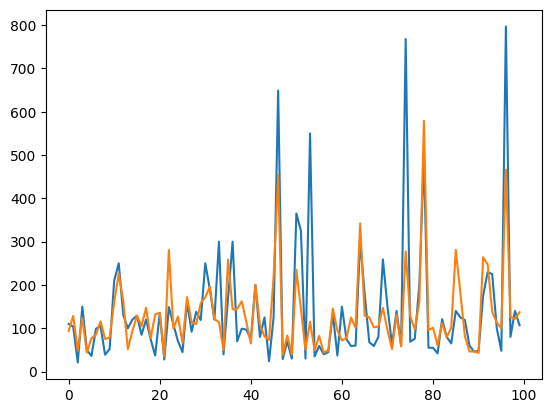

In [23]:
from IPython.display import display

plt.plot(y_test[:100])
plt.plot(y_test_pred[:100], label='y_test_pred')
plt.show()

# display(y_test[:20])
# display(y_test_pred[:20])

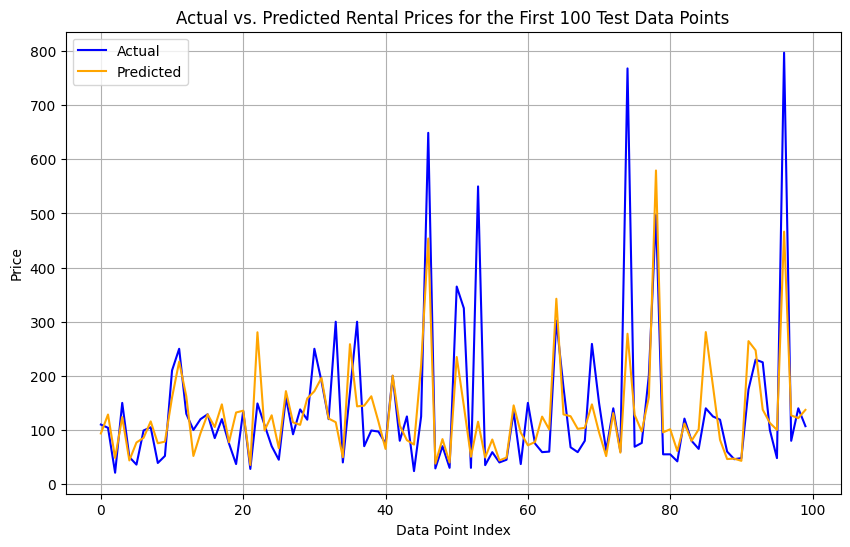

In [24]:
plt.figure(figsize=(10, 6))  # Set a larger figure size for better readability
plt.plot(y_test[:100], label='Actual', color='blue')  # Add label and color for actual
plt.plot(y_test_pred[:100], label='Predicted', color='orange')  # Already labeled predicted
plt.title('Actual vs. Predicted Rental Prices for the First 100 Test Data Points')  # Add a title
plt.xlabel('Data Point Index')  # Label x-axis
plt.ylabel('Price')  # Label y-axis
plt.legend()  # Display legend
plt.grid(True)  # Add gridlines
plt.show()